In [1]:
import investpy
# !pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr
import investpy
import sklearn
from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import warnings
# from warnings import filterwarnings

import arviz as az
import matplotlib
import numpy as np
import pymc3 as pm
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import seaborn as sn


from matplotlib import pyplot as plt
print(f"Running on PyMC3 v{pm.__version__}")

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC3 v3.11.2


In [2]:
# TODO: Need DXY (US Dollar) monthly data
# TODO: US10yr Treasury Maturity Rate - Need to replace with monthly data
# TODO: BUND Monthy data 
# XLK: Tech Monthly data - ETF
# XLF: Finance Monthly data - ETF
# BTC: Monthly data - ETF

# Headline CPI - yoy% change monthly and quarterly
# Consumer Price Index for All Urban Consumers: Energy in U.S. City Average (CPIENGSL) MONTHLY: Seasonally Adjusted
# Personal Consumption Expenditures Excluding Food and Energy (Chain-Type Price Index) (PCEPILFE) MONTHLY: Seasonally Adjusted
# Consumer Price Index for All Urban Consumers: Transportation Services in U.S. City Average (CUSR0000SAS4) MONTHLY: Seasonally Adjusted
# Producer Price Index by Commodity: All Commodities (PPIACO) MONTHLY: Not Seasonally Adjusted

# Setting up the Start and End time 
# series_code = ['CURRCIR', 'DGS10']
data_source = 'fred'

start = datetime.datetime (1960, 1, 1)      #  (2005, 5, 1)
end = datetime.datetime (2030, 12, 1)

CPI_Headline = pdr.DataReader('CPIAUCSL', data_source, start, end)
CPI_Headline.index.names = ['Date']
CPI_Headline.columns = ['CPI_Headline']


# TODO: Need DXY (US Dollar) monthly data
# TODO: BUND Monthy data 

copperProducts = pdr.DataReader('WPUSI019011', data_source, start, end)
copperProducts.index.names = ['Date']
copperProducts.columns = ['Copper/Prod']
iron_steel = pdr.DataReader('WPU101', data_source, start, end)
iron_steel.index.names = ['Date']
iron_steel.columns = ['Iron/Steel']
chemical_man = pdr.DataReader('PCU325325', data_source, start, end)
chemical_man.index.names = ['Date']
chemical_man.columns = ['ChemMan']
con_mach_eq = pdr.DataReader('WPS112', data_source, start, end)
con_mach_eq.index.names = ['Date']
con_mach_eq.columns = ['ConMachEq']

fed_fundsRate = pdr.DataReader('FEDFUNDS', data_source, start, end)
fed_fundsRate.index.names = ['Date']
fed_fundsRate.columns = ['FedFundsRate']
PCE = pdr.DataReader('PCEPI', data_source, start, end)
PCE.index.names = ['Date']
PCE.columns = ['PersonalConExp']

In [3]:
"""Need to turn oil, gold , and silver into monthly 
as well as use gold and silver as a ratio"""

gold = investpy.commodities.get_commodity_historical_data('Gold', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
gold.index.names = ['Date']
silver = investpy.commodities.get_commodity_historical_data('Silver', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
silver.index.names = ['Date']
copper = investpy.commodities.get_commodity_historical_data('Copper', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country='united states', 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
lumber = investpy.commodities.get_commodity_historical_data('Lumber', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
lumber.index.names = ['Date']
nat_gas = investpy.commodities.get_commodity_historical_data('Natural Gas', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
nat_gas.index.names = ['Date']
crude = investpy.commodities.get_commodity_historical_data('Crude Oil WTI', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
crude.index.names = ['Date']
corn = investpy.commodities.get_commodity_historical_data('US Corn', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
corn.index.names = ['Date']
wheat = investpy.commodities.get_commodity_historical_data('US Wheat', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
wheat.index.names = ['Date']
soy = investpy.commodities.get_commodity_historical_data('US Soybeans', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
soy.index.names = ['Date']
sugar = investpy.commodities.get_commodity_historical_data('US Sugar #11', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
sugar.index.names = ['Date']
coffee = investpy.commodities.get_commodity_historical_data('US Coffee C', 
                                                   from_date = '01/01/1980', 
                                                   to_date = '01/01/2030', 
                                                   country=None, 
#                                                    as_json=False, 
                                                   order='ascending', 
                                                   interval='Monthly')
coffee.index.names = ['Date']

US10yr = investpy.bonds.get_bond_historical_data(bond='U.S. 10Y', 
                                        from_date = '01/01/1980', 
                                        to_date = '01/01/2030', 
#                                         country=united states, 
                                        order='ascending', 
                                        interval='Monthly')
US10yr.index.names = ['Date']

DXY = investpy.indices.get_index_historical_data('US Dollar Index', 
                                        from_date = '01/01/1980', 
                                        to_date = '01/01/2030', 
                                        country='united states', 
                                        order='ascending', 
                                        interval='Monthly')
DXY.index.names = ['Date']

# TRCCRB
CRB = investpy.indices.get_index_historical_data('TR/CC CRB', 
                                                 from_date = '01/01/1980', 
                                                 to_date = '01/01/2030', 
                                                 country='world', 
                                                 order='ascending', 
                                                 interval='Monthly')
CRB.index.names = ['Date']                                        

In [4]:
CRB.tail(1)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2021-03-01,192.1,192.98,188.61,190.75,0,USD


In [5]:
# investpy.indices.get_indices(country='united states', symbol='TRCCRB')
# investpy.indices.search_indices(by='symbol', value='TRCCRB')

In [1]:
# Dropping columns
drop_cols = ['Open', 'High', 'Low', 'Currency']

gold = gold.drop(drop_cols, axis=1)
gold.columns = ["Gold", "GoldVolm"]
silver = silver.drop(drop_cols, axis=1)
silver.columns = ["Silver", "SilverVolm"]

tempMerge = pd.merge(silver, gold, left_index=True, right_index=True)
tempMerge['sil_goldRatio'] = tempMerge["Silver"] / tempMerge["Gold"]
sil_goldRatio = tempMerge.copy()
sil_goldRatio = sil_goldRatio.drop(["Silver", "Gold"], axis=1)
sil_goldRatio['DiffSilGold_Volm'] = sil_goldRatio['GoldVolm'] - sil_goldRatio['SilverVolm'] 

sil_goldRatio.columns = ["SilverVolm", "GoldVolm", "Sil_GoldRatio", "DiffSilGold_Volm"]
copper = copper.drop(drop_cols, axis=1)
copper.columns = ["Copper", "CopperVolm"]
lumber = lumber.drop(drop_cols, axis=1)
lumber.columns = ["Lumber", "LumberVolm"]
nat_gas = nat_gas.drop(drop_cols, axis=1)
nat_gas.columns = ["NatGas", "NatGasVolm"]
crude = crude.drop(drop_cols, axis=1)
crude.columns = ["WTIcrude", "CrudeVolm"]
corn = corn.drop(drop_cols, axis=1)
corn = corn.drop(["Volume"], axis = 1)
corn.columns = ["Corn"]
wheat = wheat.drop(drop_cols, axis=1)
wheat = wheat.drop(["Volume"], axis=1)
wheat.columns = ["Wheat"]
soy = soy.drop(drop_cols, axis=1)
soy = soy.drop(["Volume"], axis=1)                    
soy.columns = ["Soy"]
sugar = sugar.drop(drop_cols, axis=1)
sugar.columns = ["Sugar", "SugarVolm"]
coffee = coffee.drop(drop_cols, axis=1)
coffee.columns = ["Coffee", "CoffeeVolm"]

# US10yr
US10yr = US10yr.drop(['Open', 'High', 'Low'], axis=1)
US10yr.columns = ["US10yr"]

DXY = DXY.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
DXY.columns = ["DXY"]

CRB = CRB.drop(['Open', 'High', 'Low', 'Volume', 'Currency'], axis=1)
CRB.columns = ['CRB']
# coffee.columns = ["Coffee", "CoffeeVolm"]

NameError: name 'gold' is not defined

In [7]:
CRB.tail()

,CRB
Date,
2020-11-01,160.06
2020-12-01,167.80
2021-01-01,174.20
2021-02-01,190.43
2021-03-01,190.75


In [8]:
sil_goldRatio.tail()

,SilverVolm,GoldVolm,Sil_GoldRatio,DiffSilGold_Volm
Date,,,,
2020-11-01,25203,131262,0.012697,106059
2020-12-01,40394,96206,0.013936,55812
2021-01-01,71473,1590264,0.014567,1518791
2021-02-01,116750,362549,0.015294,245799
2021-03-01,0,0,0.014941,0


In [9]:
def roc(df, n):
    """Calulates the 2nd Derivative (Rate of Change/Acceleration)"""    
    df1 = df.copy()
    df1 = (np.log(df1).diff(n))
    df1 = df1 - (df1.shift(1))
    df1 = df1 * 100
    return df1


def percentChg(df, n):
    df1 = df.copy()
    df1 = df1.pct_change(n)
    return df1


# def convert_to_quarterly(df):
#     """Aggregates 3 months of data to a quarterly value."""
#     df1 = df.copy()
#     df1.date = pd.to_datetime(df1['Date'])
# #     df = df.set_index("DATE")
#     agg_columns = ['data_1', 'data_2']
#     extra_cols = [x for x in df.columns if x not in agg_columns]
#     df_out = df.resample("QS-JUN")[agg_columns].sum()
#     df_out.index = df_out.index + MonthEnd(1)
#     df_out[extra_cols] = df[extra_cols]  
#     return df_out

# data = convert_to_quarterly(data)

In [10]:
PCE_roc = roc(PCE, 12)
print("Max:", PCE_roc.max())
PCE_roc.tail(1)

Max: PersonalConExp    1.399316
dtype: float64


,PersonalConExp
Date,
2021-01-01,0.188474


In [11]:
sil_gold_roc = roc(sil_goldRatio, 12)
print("Max:", sil_gold_roc['Sil_GoldRatio'].max())
sil_gold_roc.tail(1)

Max: 59.27443655414773


,SilverVolm,GoldVolm,Sil_GoldRatio,DiffSilGold_Volm
Date,,,,
2021-03-01,-inf,-inf,14.249109,-inf


In [12]:
copper_roc = roc(copper, 12)
print("Max:", copper_roc.max())
copper_roc.tail(1)

Max: Copper        49.658625
CopperVolm          inf
dtype: float64


,Copper,CopperVolm
Date,,
2021-03-01,10.696737,-inf


In [13]:
FedFunds_roc = roc(fed_fundsRate, 12)
print("Max:", FedFunds_roc.max())
FedFunds_roc.tail(1)

Max: FedFundsRate    91.114933
dtype: float64


,FedFundsRate
Date,
2021-02-01,-13.695295


In [14]:
lumber_roc = roc(lumber, 12)
print("Max:", lumber_roc.max())
lumber_roc.tail(1)

Max: Lumber         40.308739
LumberVolm    112.955223
dtype: float64


,Lumber,LumberVolm
Date,,
2021-03-01,34.577225,-inf


In [15]:
CPI_Head_roc = roc(CPI_Headline, 12)
print("Max:", CPI_Head_roc.max())
CPI_Head_roc.tail(1)

Max: CPI_Headline    2.120709
dtype: float64


,CPI_Headline
Date,
2021-01-01,0.068935


In [16]:
corn_roc = roc(corn, 12)
print("Max:", corn_roc.max())
corn_roc.tail(1)

Max: Corn    44.477436
dtype: float64


,Corn
Date,
2021-03-01,3.221496


In [17]:
wheat_roc = roc(wheat, 12)
print("Max:", wheat_roc.max())
wheat_roc.tail(1)

Max: Wheat    43.244771
dtype: float64


,Wheat
Date,
2021-03-01,-9.03373


In [18]:
soy_roc = roc(soy, 12)
print("Max:", soy_roc.max())
soy_roc.tail(1)

Max: Soy    42.87158
dtype: float64


,Soy
Date,
2021-03-01,1.34363


In [19]:
sugar_roc = roc(sugar, 12)
print("Max:", sugar_roc.max())
sugar_roc.tail(1)

Max: Sugar          71.724991
SugarVolm    1064.243199
dtype: float64


,Sugar,SugarVolm
Date,,
2021-03-01,25.245359,-343.80617


In [20]:
coffee_roc = roc(coffee, 12)
print("Max:", coffee_roc.max())
coffee_roc.tail(1)

Max: Coffee         48.777193
CoffeeVolm    109.638278
dtype: float64


,Coffee,CoffeeVolm
Date,,
2021-03-01,-14.608069,-1108.498058


In [21]:
nat_gas_roc = roc(nat_gas, 12)
print("Max:", nat_gas_roc.max())
nat_gas_roc.tail(1)

Max: NatGas        63.442920
NatGasVolm    74.538919
dtype: float64


,NatGas,NatGasVolm
Date,,
2021-03-01,0.863431,-inf


In [22]:
DXY_roc = roc(DXY, 12)
print("Max:", DXY_roc.max())
DXY_roc.tail(1)

Max: DXY    12.422806
dtype: float64


,DXY
Date,
2021-03-01,-0.067643


In [23]:
US10yr_roc = roc(US10yr, 12)
print("Max:", US10yr_roc.max())
US10yr_roc.tail(1)

Max: US10yr    66.916842
dtype: float64


,US10yr
Date,
2021-03-01,66.916842


In [24]:
CRB_roc = roc(CRB, 12)
print("Max:", CRB_roc.max())
CRB.tail(1)

Max: CRB    29.413398
dtype: float64


,CRB
Date,
2021-03-01,190.75


## These seem to be leading indicators of Headline CPI 

In [25]:
con_mach_eq_roc = roc(con_mach_eq, 12)
print("Max:", con_mach_eq_roc.max())
con_mach_eq_roc.tail(1)

Max: ConMachEq    1.856201
dtype: float64


,ConMachEq
Date,
2015-12-01,0.137773


In [26]:
chemicalManuf_roc = roc(chemical_man, 12)
print("Max:", chemicalManuf_roc.max())
chemicalManuf_roc.tail(1)

Max: ChemMan    2.907561
dtype: float64


,ChemMan
Date,
2021-01-01,1.037331


In [27]:
crude_roc = roc(crude, 12)
print("Max:", crude_roc['WTIcrude'].max())
crude_roc.tail(1)

Max: 82.90289077824733


,WTIcrude,CrudeVolm
Date,,
2021-03-01,82.902891,-inf


In [28]:
ironSteel_roc = roc(iron_steel, 12)
print("Max:", ironSteel_roc.max())
ironSteel_roc.tail(1)

Max: Iron/Steel    16.161046
dtype: float64


,Iron/Steel
Date,
2021-01-01,5.55891


In [29]:
sil_gold_roc = roc(sil_goldRatio, 12)
print("Max:", sil_gold_roc['Sil_GoldRatio'].max())
sil_gold_roc.drop(['SilverVolm', 'GoldVolm', 'DiffSilGold_Volm'], axis=1, inplace=True)
sil_gold_roc.tail(1)

Max: 59.27443655414773


,Sil_GoldRatio
Date,
2021-03-01,14.249109


In [30]:
# copperProd_roc = roc(copperProducts, 12)
# print("Max:", copperProd_roc.max())
# copperProd_roc.tail(15)

In [31]:

inflation_roc = pd.merge(DXY_roc, US10yr_roc, left_index=True, right_index=True)
inflation_roc= pd.merge(inflation_roc, CRB_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, sil_gold_roc, left_index=True, right_index=True)

# inflation_roc['baseEffect_roc'] = inflation_roc['CPI_Headline'].shift(24)

inflation_roc = pd.merge(inflation_roc, crude_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, lumber_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, nat_gas_roc, left_index=True, right_index=True)
# inflation_roc = pd.merge(inflation_roc, crude_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, corn_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, wheat_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, soy_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, sugar_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, coffee_roc, left_index=True, right_index=True)
inflation_roc = pd.merge(inflation_roc, copper_roc, left_index=True, right_index=True)

# inflation_roc = pd.merge(inflation_roc, PCE_roc, left_index=True, right_index=True)
# inflation_roc = pd.merge(inflation_roc, ironSteel_roc, left_index=True, right_index=True)
# inflation_roc = pd.merge(inflation_roc, chemicalManuf_roc, left_index=True, right_index=True)
# inflation_roc = pd.merge(inflation_roc, copperProd_roc, left_index=True, right_index=True)
# inflation_roc = pd.merge(inflation_roc, con_mach_eq_roc, left_index=True, right_index=True)
inflation_roc.drop(["CrudeVolm", "LumberVolm", "NatGasVolm", "SugarVolm", "CoffeeVolm", "CopperVolm"], axis=1, inplace=True)
print(inflation_roc.shape)
inflation_roc.tail(5)

(326, 13)


,DXY,US10yr,CRB,Sil_GoldRatio,WTIcrude,Lumber,NatGas,Corn,Wheat,Soy,Sugar,Coffee,Copper
Date,,,,,,,,,,,,,
2020-11-01,-3.275175,-8.699285,10.197990,3.369421,21.841363,20.047909,-0.815923,10.122285,-9.320641,16.160457,-2.580442,-0.577386,11.109863
2020-12-01,-0.191542,0.566902,-0.316597,8.618707,-3.365122,34.309346,-8.554507,9.894050,6.810641,4.076040,2.893375,-2.921592,-2.294740
2021-01-01,-0.323042,39.934302,12.442797,7.740233,24.221722,-5.607238,18.293415,13.926937,4.278695,11.857834,-6.324787,19.169523,11.082434
2021-02-01,-0.426308,53.065701,15.497052,12.528081,30.538597,20.203196,16.677671,5.487661,4.839055,0.816414,11.232683,3.704377,13.492739
2021-03-01,-0.067643,66.916842,27.111114,14.249109,82.902891,34.577225,0.863431,3.221496,-9.033730,1.343630,25.245359,-14.608069,10.696737


In [32]:
inflation_roc.corr()

,DXY,US10yr,CRB,Sil_GoldRatio,WTIcrude,Lumber,NatGas,Corn,Wheat,Soy,Sugar,Coffee,Copper
DXY,1.000000,0.040870,-0.423360,-0.186611,-0.261512,-0.131018,-0.142759,-0.231193,-0.344677,-0.250060,-0.195022,-0.194278,-0.373223
US10yr,0.040870,1.000000,0.324981,0.189832,0.383173,0.148540,-0.039033,0.054064,-0.028242,0.086441,0.098784,0.085010,0.291459
CRB,-0.423360,0.324981,1.000000,0.311206,0.842878,0.274950,0.450493,0.387105,0.327692,0.378537,0.388854,0.298822,0.570085
Sil_GoldRatio,-0.186611,0.189832,0.311206,1.000000,0.223485,0.185734,0.014818,0.161692,0.025435,0.116947,0.209240,0.216728,0.310512
WTIcrude,-0.261512,0.383173,0.842878,0.223485,1.000000,0.250157,0.265068,0.093573,0.057963,0.103030,0.222344,0.084378,0.390948
Lumber,-0.131018,0.148540,0.274950,0.185734,0.250157,1.000000,-0.046626,0.069069,0.140939,0.145111,0.121599,0.105481,0.220347
NatGas,-0.142759,-0.039033,0.450493,0.014818,0.265068,-0.046626,1.000000,0.218222,0.202850,0.154573,0.116644,0.047527,0.100287
Corn,-0.231193,0.054064,0.387105,0.161692,0.093573,0.069069,0.218222,1.000000,0.632538,0.668872,0.117176,0.206808,0.183388
Wheat,-0.344677,-0.028242,0.327692,0.025435,0.057963,0.140939,0.202850,0.632538,1.000000,0.504941,0.117794,0.201593,0.223765
Soy,-0.250060,0.086441,0.378537,0.116947,0.103030,0.145111,0.154573,0.668872,0.504941,1.000000,0.137605,0.179944,0.261610


In [33]:
# Merging Inflation 'Possible' Factors - Commodities

inflation_factors = pd.merge(DXY, US10yr, left_index=True,right_index=True)
inflation_factors = pd.merge(inflation_factors, CRB, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, sil_goldRatio, left_index=True, right_index=True)
inflation_factors.drop(['SilverVolm', 'GoldVolm', 'DiffSilGold_Volm'], axis=1, inplace=True)

# inflation_factors['baseEffect'] = inflation_factors['CPI_Headline'].shift(24)
# inflation_factors['baseEffect_2yr'] = (inflation_factors['CPI_Headline'] - inflation_factors['baseEffect']) / inflation_factors['baseEffect'] * 100
# inflation_factors.drop(['baseEffect'], axis=1, inplace=True)

# inflation_factors['Inflation_yoy%'] = percentChg(inflation_factors['CPI_Headline'], 12)
# inflation_factors.drop(['CPI_Headline'], axis=1, inplace=True)

inflation_factors = pd.merge(inflation_factors, copper, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, lumber, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, nat_gas, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, crude, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, corn, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, wheat, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, soy, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, sugar, left_index=True, right_index=True)
inflation_factors = pd.merge(inflation_factors, coffee, left_index=True, right_index=True)

inflation_factors.drop(["CrudeVolm", "LumberVolm", "NatGasVolm", "SugarVolm", "CoffeeVolm", "CopperVolm"], axis=1, inplace=True)


# inflation_factors = pd.merge(inflation_factors, PCE, left_index=True, right_index=True)

print(inflation_factors.shape)
inflation_factors.tail(15)

(326, 13)


,DXY,US10yr,CRB,Sil_GoldRatio,Copper,Lumber,NatGas,WTIcrude,Corn,Wheat,Soy,Sugar,Coffee
Date,,,,,,,,,,,,,
2020-01-01,97.39,1.505,170.31,0.011417,2.5610,435.5,1.841,51.56,381.25,553.38,872.62,14.61,102.65
2020-02-01,98.13,1.163,159.45,0.010575,2.5750,399.4,1.684,44.76,366.50,525.25,893.12,14.46,110.10
2020-03-01,99.05,0.668,121.79,0.008959,2.2625,278.5,1.640,20.48,340.75,567.75,885.50,10.42,119.55
2020-04-01,99.02,0.646,117.20,0.008941,2.3805,319.7,1.949,18.84,311.50,523.50,855.50,10.39,104.65
2020-05-01,98.34,0.653,132.24,0.010603,2.4755,367.1,1.849,35.49,325.75,521.62,840.50,10.91,96.30
2020-06-01,97.39,0.658,137.97,0.010400,2.7605,435.7,1.751,39.27,338.50,490.75,883.00,11.84,100.05
2020-07-01,93.35,0.533,143.69,0.012421,2.9110,585.8,1.799,40.27,316.00,531.00,897.25,12.64,118.95
2020-08-01,92.14,0.706,153.21,0.014492,3.0820,928.0,2.630,42.61,348.50,546.50,952.50,12.66,129.80
2020-09-01,93.89,0.686,148.51,0.012435,3.0425,612.2,2.527,40.22,379.00,578.12,1021.75,13.07,110.95


In [34]:
inflation_factors.corr()

,DXY,US10yr,CRB,Sil_GoldRatio,Copper,Lumber,NatGas,WTIcrude,Corn,Wheat,Soy,Sugar,Coffee
DXY,1.000000,0.199738,-0.679878,-0.282018,-0.649143,0.074901,-0.317213,-0.676074,-0.615314,-0.698132,-0.636369,-0.556410,-0.562928
US10yr,0.199738,1.000000,-0.257615,0.194391,-0.663809,-0.195791,0.004203,-0.563209,-0.556224,-0.537255,-0.662779,-0.466027,-0.133858
CRB,-0.679878,-0.257615,1.000000,0.545723,0.641217,-0.234515,0.739040,0.842654,0.528467,0.590493,0.535644,0.427725,0.318126
Sil_GoldRatio,-0.282018,0.194391,0.545723,1.000000,0.194332,-0.243145,0.358918,0.333559,0.274196,0.177741,0.121873,0.219760,0.306760
Copper,-0.649143,-0.663809,0.641217,0.194332,1.000000,0.135032,0.202607,0.874521,0.770780,0.810238,0.807890,0.726560,0.511846
Lumber,0.074901,-0.195791,-0.234515,-0.243145,0.135032,1.000000,-0.226464,-0.073869,0.022958,-0.000628,0.127697,-0.054448,-0.021200
NatGas,-0.317213,0.004203,0.739040,0.358918,0.202607,-0.226464,1.000000,0.430967,0.020052,0.144420,0.037568,-0.050105,-0.156434
WTIcrude,-0.676074,-0.563209,0.842654,0.333559,0.874521,-0.073869,0.430967,1.000000,0.750847,0.779527,0.795073,0.628123,0.422902
Corn,-0.615314,-0.556224,0.528467,0.274196,0.770780,0.022958,0.020052,0.750847,1.000000,0.886422,0.912524,0.703805,0.581416
Wheat,-0.698132,-0.537255,0.590493,0.177741,0.810238,-0.000628,0.144420,0.779527,0.886422,1.000000,0.881567,0.605129,0.510690


In [35]:
inflation_factors.columns

Index(['DXY', 'US10yr', 'CRB', 'Sil_GoldRatio', 'Copper', 'Lumber', 'NatGas',
       'WTIcrude', 'Corn', 'Wheat', 'Soy', 'Sugar', 'Coffee'],
      dtype='object')

In [36]:
inflation_factors.to_csv('inflation_factors.csv')

In [37]:
inflation_roc.to_csv('inflation_roc.csv')

In [38]:
data = inflation_factors.copy()
data.head()

,DXY,US10yr,CRB,Sil_GoldRatio,Copper,Lumber,NatGas,WTIcrude,Corn,Wheat,Soy,Sugar,Coffee
Date,,,,,,,,,,,,,
1994-02-01,94.55,6.133,118.03,0.014043,0.863,429.8,2.208,14.48,285.50,342.50,677.25,11.46,74.60
1994-03-01,93.06,6.738,118.45,0.014729,0.866,380.6,2.075,14.79,274.75,329.75,681.75,11.96,82.20
1994-04-01,92.12,7.041,122.47,0.014174,0.913,332.5,2.067,16.90,269.00,326.50,677.25,11.29,89.15
1994-05-01,92.52,7.152,130.67,0.014286,1.040,397.7,1.917,18.31,278.75,327.50,701.00,12.04,126.00
1994-06-01,89.62,7.325,135.20,0.013945,1.071,343.2,2.184,19.37,249.25,312.75,658.50,11.49,189.75


In [39]:
CPI_Headline['CPI_yoy%'] = percentChg(CPI_Headline, 12)

In [40]:
data = pd.merge(CPI_Headline, data, left_index=True, right_index=True)
data.head()

,CPI_Headline,DXY,US10yr,CRB,Sil_GoldRatio,Copper,Lumber,NatGas,WTIcrude,Corn,Wheat,Soy,Sugar,Coffee
Date,,,,,,,,,,,,,,
1994-02-01,0.025157,94.55,6.133,118.03,0.014043,0.863,429.8,2.208,14.48,285.50,342.50,677.25,11.46,74.60
1994-03-01,0.026518,93.06,6.738,118.45,0.014729,0.866,380.6,2.075,14.79,274.75,329.75,681.75,11.96,82.20
1994-04-01,0.023644,92.12,7.041,122.47,0.014174,0.913,332.5,2.067,16.90,269.00,326.50,677.25,11.29,89.15
1994-05-01,0.022885,92.52,7.152,130.67,0.014286,1.040,397.7,1.917,18.31,278.75,327.50,701.00,12.04,126.00
1994-06-01,0.024948,89.62,7.325,135.20,0.013945,1.071,343.2,2.184,19.37,249.25,312.75,658.50,11.49,189.75


In [41]:
CPI = data[['CPI_Headline']]
CPI.head()

,CPI_Headline
Date,
1994-02-01,0.025157
1994-03-01,0.026518
1994-04-01,0.023644
1994-05-01,0.022885
1994-06-01,0.024948


In [73]:
def roc(df, n):
    """Calulates the First Difference of the 2nd Derivative (Rate of Change/Acceleration)"""    
    df1 = df.copy()
    df1 = (np.log(df1).diff(n))
    df1 = df1 - (df1.shift(1))
    df1 = df1 * 100
    return df1

def ROC(df, n):
    """Calulates the 2nd Derivative (Rate of Change/Acceleration)"""    
    df1 = df.copy()
    df1 = np.log(df1 / df1.shift(n))
    df1 = df1 * 100
    return df1

In [74]:
# CPI_Headline['CPI_Headline'].diff(12).tail(13)


In [107]:
# data.head()
CPI_Headline = pdr.DataReader('CPIAUCSL', data_source, start, end)
CPI_Headline.index.names = ['Date']
CPI_Headline.columns = ['CPI_Headline']
CPI_Headline.dropna(inplace=True)
CPI_Headline['CPI_yoy%'] = percentChg(CPI_Headline, 12)
CPI_Headline.tail(13)

,CPI_Headline,CPI_yoy%
Date,,
2020-01-01,258.687,0.024742
2020-02-01,258.824,0.023145
2020-03-01,257.989,0.015117
2020-04-01,256.192,0.003392
2020-05-01,255.942,0.002236
2020-06-01,257.282,0.007278
2020-07-01,258.604,0.010468
2020-08-01,259.511,0.013248
2020-09-01,260.149,0.014100


In [112]:
# CPI_Headline['CPI_yoy_roc'] = ROC(CPI_Headline['CPI_Headline'], 12)
CPI_Headline['CPI_yoyFirstDiffroc'] = roc(CPI_Headline['CPI_Headline'], 12)
# CPI_Headline['mean_yoy2'] = CPI_Headline['CPI_yoy%'].rolling(2).mean()
CPI_Headline.tail(40)

,CPI_Headline,CPI_yoy%,CPI_yoyFirstDiffroc
Date,,,
2017-10-01,246.657,0.020336,-0.191011
2017-11-01,247.378,0.022113,0.174057
2017-12-01,247.736,0.021015,-0.107521
2018-01-01,248.721,0.020938,-0.007501
2018-02-01,249.300,0.022258,0.129134
2018-03-01,249.517,0.023592,0.130481
2018-04-01,250.275,0.024567,0.095147
2018-05-01,250.786,0.027521,0.287925
2018-06-01,251.152,0.028393,0.084805


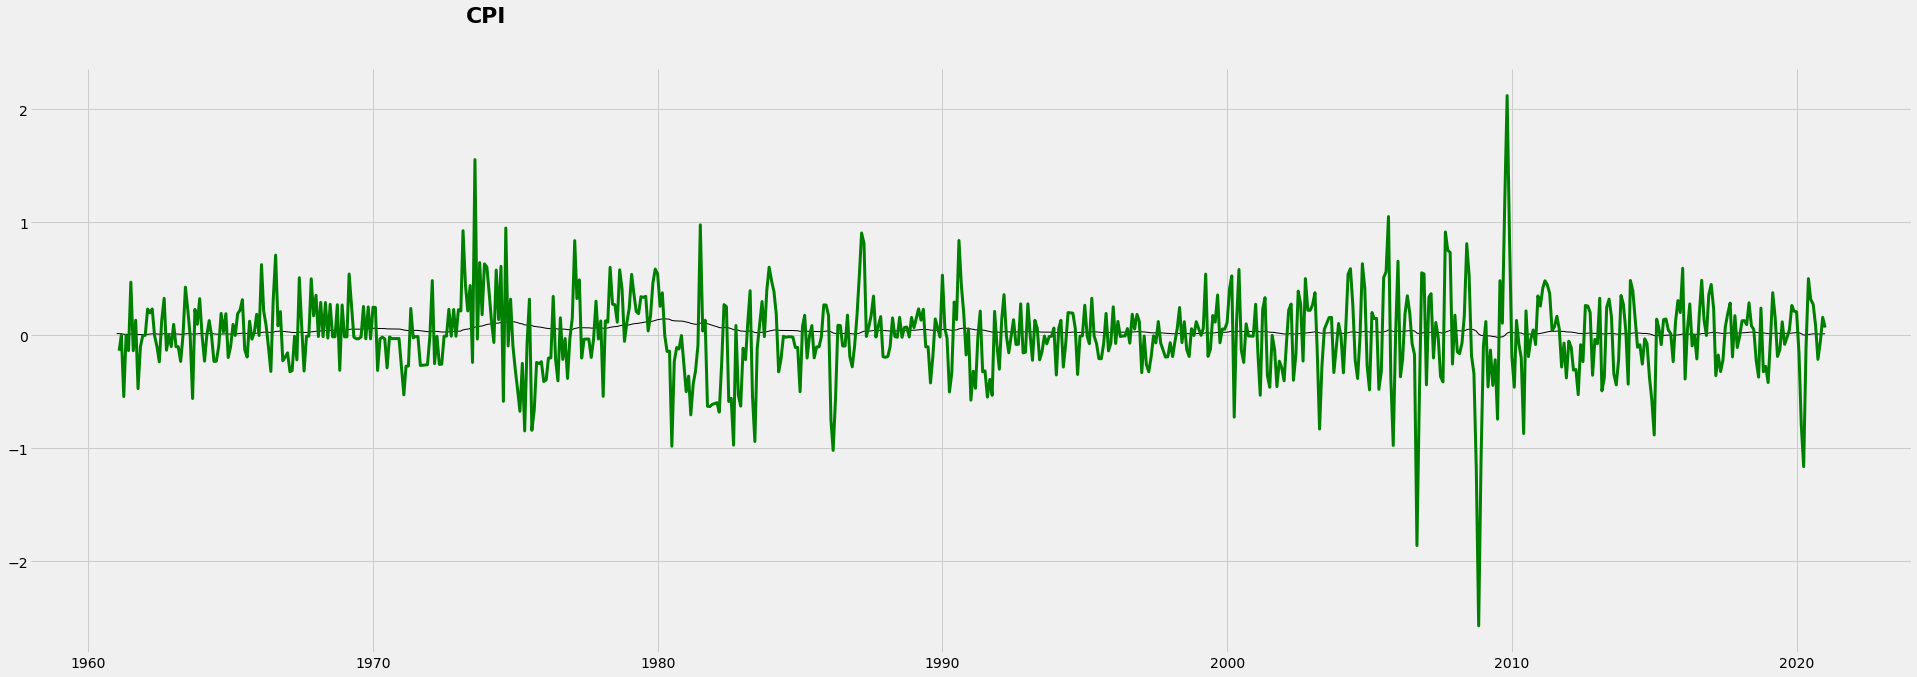

In [109]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,10))  # chart 3:1

ax.set_title("CPI", 
             fontsize=22, fontweight='bold', x=.242, y=1.07)
# plt.plot(CPI_Headline.index, CPI_Headline['mean_yoy2'], color='red', linewidth=1)
plt.plot(CPI_Headline.index, CPI_Headline['CPI_yoy%'], color='black', linewidth=1)
plt.plot(CPI_Headline.index, CPI_Headline['CPI_yoyFirstDiffroc'], color='green', linewidth=3)
# plt.plot(vix['Close'].rolling(90).mean(), color='r', linewidth=1)

# Turn off the spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## Variational Inference: Bayesian Neural Network

## Factor Analysis

In [42]:
# CRB_d = investpy.indices.get_index_historical_data('TR/CC CRB', 
#                                                  from_date = '01/01/1980', 
#                                                  to_date = '01/01/2030', 
#                                                  country='world', 
#                                                  order='ascending', 
#                                                  interval='weekly')
# CRB_d.tail(20)